# Tempo de processamento Lista x Array

In [3]:
import numpy as np
import time

# cria uma lista com 1000000 elementos
lista = list(range(1000000))

# transforma a lista em um array Numpy
array = np.array(lista)

# começa a cronometrar o tempo para a operação com a lista
start_time = time.time()

# realiza a operação de elevar ao quadrado cada elemento da lista
lista_quadrado = [i**2 for i in lista]

# para o cronômetro
list_time = time.time() - start_time

# começa a cronometrar o tempo para a operação com o array
start_time = time.time()

# realiza a operação de elevar ao quadrado cada elemento do array
array_quadrado = array**2

# para o cronômetro
array_time = time.time() - start_time

print("Tempo da operação com a lista: ", list_time)
print("Tempo da operação com o array: ", array_time)

Tempo da operação com a lista:  0.21494364738464355
Tempo da operação com o array:  0.0


In [ ]:
#calculando todos os anos  que acontecerão as copas do mundo neste seculo
import numpy as np

ano_inicial = 2002
ano_final = 2102
np.arange(ano_inicial, ano_final + 1, 4)

In [ ]:
#carregando arquivos citrus

import numpy as np 

url_local = '../files/citrus.csv'
dado = np.loadtxt(url_local, delimiter=',',usecols=np.arange(1,6,1),skiprows=1)

dado.shape

(10000, 5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar uma sequência de valores de x de -1 a 1
x = np.arange(-1, 1.01, 0.0001)

# Implementação da fórmula
y1 = np.sqrt(1 - x**2)
y2 = -np.sqrt(1 - x**2)

# Plotar o gráfico com as duas partes do círculo
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'r' )

# Adicionar o título do gráfico e os rótulos dos eixos x e y
plt.title("Círculo")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")

# Exibir o gráfico
plt.show()

# DESAFIO - Leitura de arquivo e analise dos dados 

https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

Se você clicar no link verá que temos um arquivo com 6 colunas, sendo a primeira coluna do arquivo uma coluna de texto e a primeira linha do arquivo também é uma coluna de texto. 

Aqui o desafio é ler esse arquivo. Para isso importe a numpy e use a função loadtxt. Use o link da url, o parâmetro usecols para pular a primeira coluna. Você pode usar np.arange para criar a sequência de números que representam as colunas. Por fim, você também deve incluir o parâmetro skiprows=1 para que a primeira linha de texto seja desconsiderada na leitura do arquivo. 

In [ ]:
import numpy as np
url = '../files/citrus.csv'
dado = np.loadtxt(url, delimiter=',',usecols=np.arange(1,6,1),skiprows=1)

In [ ]:
dado

## Seleção de dados

Desses a colunas que iremos avaliar são as de diâmetro e peso. Crie um arrays específicos para guardar o diâmetro e peso da laranja e toranja. O diâmtro está na coluna zero e o peso na coluna 1. Os dados referentes a laranja vão até a linha 4999 e os referentes à toranja iniciam na linha 5000 do arquivo. 

In [ ]:
diametro_laranja = dado[:5000,0]
diametro_toranja = dado[5000:,0]
peso_laranja = dado[:5000,1]
peso_toranja = dado[5000:,1]

## Visualização de dados

Importe a biblioteca matplotlib e crie um gráfico separado para a laranja e outro para a toranja do peso pelo diâmetro. 

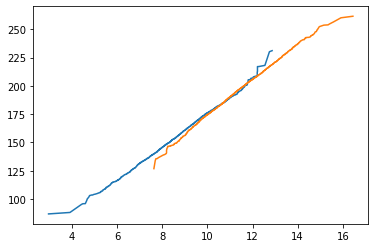

In [ ]:
import matplotlib.pyplot as plt

plt.plot(diametro_laranja, peso_laranja)
plt.plot(diametro_toranja, peso_toranja)

## O coeficiente das retas

As duas parecem ter uma inclinação muito parecida em uma primeira inspeção visual vamos determinar os coeficientes da reta para cada um dos casos. 

Lembre que para o coeficiente angular precisamos implementar a função:
$$ \hat{a} = \frac{n*Soma( X_i*Y_i ) - Soma( X_i )*Soma(Y_i)}{n Soma(X_i^2) - (Soma(X_i))^2}$$ 

e para o coeficiente linear:
$$ \hat{b} = Media(Y_i) - \hat{a} * Media(X_i) $$


Perceba que nesse caso o X é o diâmtro e o Y é o peso. Além disso o n é o número de elementos dentro do X, por exemplo.Ele vai ser diferente para a laranja e toranja. Determine o coefiecente para cada caso:

In [ ]:
Y = peso_laranja
X = diametro_laranja
n = np.size(X)

In [ ]:
a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
a

14.7997452319846

In [ ]:
b = np.mean(Y) - a*np.mean(X)
b

27.38560381218413

In [ ]:
Y = peso_toranja
X = diametro_toranja
n = np.size(X)

In [ ]:
a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
a

15.70884459360376

In [ ]:
b = np.mean(Y) - a*np.mean(X)
b

17.007102876817726

Se deu tudo você deve ter chegado em valores diferentes para cada um dos casos. Então, embora a inclinação da reta seja parecida nós descobrimos que os coeficientes da reta servem como uma forma de diferenciar se as frutas são laranjas ou toranjas. 

## Estimando através de números aleatórios

Agora ao invés de usar a fórmula fechada utilize a np.random.uniform para gerar valores aleatórios para determinar o coeficiente angular da toranja. Nesse caso vamos assumir que b é igual a 17. Utilize o random.seed(84). 

In [1]:
b =17

In [ ]:
norma = np.array([])
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.0,high=30.0,size=100)

for i in range(100):
  norma = np.append(norma,np.linalg.norm(Y- (coef_angulares[i]*X+b)))

In [ ]:
norma


Se deu tudo certo a menor norma que você alcançou foi 104.40529157196431.

In [ ]:
np.min(norma)

Algo que não foi passado no curso é que também podemos utilizar condições dentro dos colchetes dos arrays para encontrar um determinado valor. O código abaixo mostra o coeficiente angular que corresponde ao menor valor da norma. Repare que a condição é a: norma == np.min(norma).

In [ ]:
coef_angulares[norma == np.min(norma)]